# Simple Regression Analysis

In [2]:
# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
# Importing the dataset
# ---------------------
dataset = pd.read_csv('Salary_Data.csv')

In [77]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [78]:
x = dataset.drop('Salary', 1)
y = dataset.Salary

In [79]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [80]:
type(x)

pandas.core.frame.DataFrame

In [81]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [82]:
type(y)

pandas.core.series.Series

In [83]:
# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [84]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

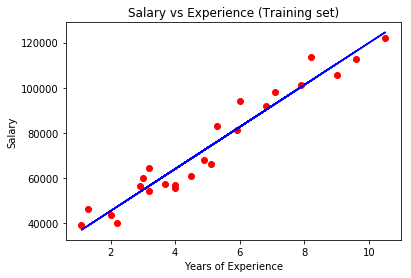

In [86]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

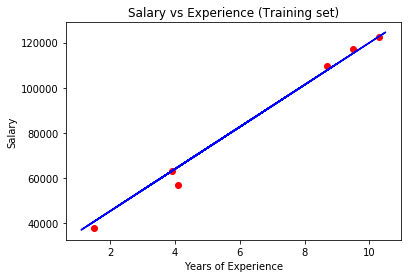

In [87]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple regression

In [3]:
# Importing the dataset
# Using startup dataset now.

df2 = pd.read_csv('50_Startups.csv')
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Dummy Variable

In [4]:
df2['State'].value_counts().sort_values(ascending=False).head()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [5]:
# we want to use k-1 approach to keep base category
df2 = pd.get_dummies(df2,columns=['State'])

In [6]:
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## Splitting data as dependent and independent variables

In [20]:
x = df2.drop('Profit', 1)
y=df2.Profit

In [21]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [22]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [23]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

C:\Users\Humza\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [ ]:
#Checking our model of y-test with y_predict

In [31]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [30]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [36]:
import statsmodels.formula.api as sm

In [43]:
x=np.append(arr=np.ones((50, 1)).astype(int), values=x, axis=1)
x

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+0

In [99]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
x = np.append(arr=np.ones((50, 1)).astype(int), values=x, axis=1)
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           1.34e-27
Time:                        16:18:20   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
x_opt = x[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           9.72e-29
Time:                        16:18:34   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
x1             0.7967      0.042     18.771      0.000       0.711       0.882
x2             0.0298      0.016      1.842      0.072      -0.003       0.062
x3           140.7869   3341.599      0.042      0.967   -6589.538    6871.112
x4           -19.5234   3229.138     -0.006      0.995   -6523.340    6484.294
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     8.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
x_opt = x[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     19.71
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           2.32e-08
Time:                        16:18:44   Log-Likelihood:                -579.99
No. Observations:                  50   AIC:                             1168.
Df Residuals:                      46   BIC:                             1176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.864e+04   8984.018      6.527      0.000    4.06e+04    7.67e+04
x1             0.2480      0.033      7.525      0.000       0.182       0.314
x2         -1194.5800   9818.999     -0.122      0.904    -2.1e+04    1.86e+04
x3          4196.5465   9467.707      0.443      0.660   -1.49e+04    2.33e+04
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.973
Skew:                          -0.299   Prob(JB):                        0.226
Kurtosis:                       4.034   Cond. No.                     8.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
x_opt = x[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     30.20
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           3.68e-09
Time:                        16:18:54   Log-Likelihood:                -580.00
No. Observations:                  50   AIC:                             1166.
Df Residuals:                      47   BIC:                             1172.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.825e+04   8295.652      7.022      0.000    4.16e+04    7.49e+04
x1             0.2471      0.032      7.764      0.000       0.183       0.311
x2          4768.2383   8132.646      0.586      0.560   -1.16e+04    2.11e+04
==============================================================================
Omnibus:                        3.886   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.200
Skew:                          -0.303   Prob(JB):                        0.202
Kurtosis:                       4.081   Cond. No.                     6.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
x_opt = x[:, [0, 3]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           4.38e-10
Time:                        16:19:06   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
x1             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""